In [22]:
from datasets import load_dataset
from transformers import AutoTokenizer
from Levenshtein import distance, ratio
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('UCLA-AGI/zephyr-7b-sft-full-SPIN-iter0')

In [29]:
# lev_ratio = []
# lev_distance = []
# for example in dataset:
def cal_lev_dist(example, tokenizer):
    real_tokens = tokenizer.encode(example['real'][1]['content'])
    generated_tokens = tokenizer.encode(example['generated'][1]['content'])
    example['lev_ratio'] = ratio(real_tokens, generated_tokens)
    example['lev_distance'] = distance(real_tokens, generated_tokens)
    return example

In [90]:
spin0_dataset = load_dataset('UCLA-AGI/SPIN_iter0', split='train')
# spin0_dataset = spin0_dataset.select(torch.randperm(len(spin0_dataset))[:10000])
spin0_dataset = spin0_dataset.map(cal_lev_dist, fn_kwargs={"tokenizer": tokenizer})

Map: 100%|██████████| 49792/49792 [01:19<00:00, 626.34 examples/s]


In [91]:
spin1_dataset = load_dataset('UCLA-AGI/SPIN_iter1', split='train')
# spin1_dataset = spin1_dataset.select(torch.randperm(len(spin1_dataset))[:10000])
spin1_dataset = spin1_dataset.map(cal_lev_dist, fn_kwargs={"tokenizer": tokenizer})

Using the latest cached version of the dataset since UCLA-AGI/SPIN_iter1 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/ubuntu/shared/hieunn/huggingface/datasets/UCLA-AGI___spin_iter1/default/0.0.0/e80a86df5b3a27ba4f64de56309504c5e09ce401 (last modified on Thu May  2 09:48:03 2024).
Map: 100%|██████████| 49792/49792 [01:11<00:00, 698.97 examples/s]


In [92]:
spin2_dataset = load_dataset('UCLA-AGI/SPIN_iter2', split='train')
# spin2_dataset = spin2_dataset.select(torch.randperm(len(spin2_dataset))[:10000])
spin2_dataset = spin2_dataset.map(cal_lev_dist, fn_kwargs={"tokenizer": tokenizer})

Map: 100%|██████████| 49792/49792 [01:14<00:00, 666.27 examples/s]


In [93]:
spin3_dataset = load_dataset('UCLA-AGI/SPIN_iter3', split='train')
# spin3_dataset = spin3_dataset.select(torch.randperm(len(spin3_dataset))[:10000])
spin3_dataset = spin3_dataset.map(cal_lev_dist, fn_kwargs={"tokenizer": tokenizer})

Using the latest cached version of the dataset since UCLA-AGI/SPIN_iter3 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/ubuntu/shared/hieunn/huggingface/datasets/UCLA-AGI___spin_iter3/default/0.0.0/c45da3fca517a625244f47c808f723cee10083e7 (last modified on Thu May  2 09:43:28 2024).
Map: 100%|██████████| 49792/49792 [01:15<00:00, 660.59 examples/s]


(array([  28.,   51.,  119.,  147.,  227.,  291.,  404.,  435.,  592.,
         604.,  755.,  789.,  932.,  976., 1162., 1432., 1811., 2289.,
        2721., 2951., 3010., 2814., 2592., 2356., 2109., 1864., 1631.,
        1369., 1264., 1056.,  900.,  801.,  746.,  598.,  575.,  510.,
         466.,  479.,  405.,  371.,  305.,  303.,  315.,  306.,  239.,
         245.,  231.,  220.,  208.,  177.,  134.,  161.,  130.,  133.,
         108.,  123.,   85.,   83.,   80.,   90.,   77.,   70.,   75.,
          73.,   72.,   77.,   68.,   61.,   49.,   49.,   34.,   52.,
          38.,   39.,   46.,   40.,   35.,   29.,   34.,   35.,   23.,
          29.,   31.,   21.,   23.,   23.,   25.,   17.,   20.,   21.,
          15.,   18.,    7.,   22.,   16.,   13.,    8.,   22.,   15.,
          62.]),
 array([0.00176678, 0.01174912, 0.02173145, 0.03171378, 0.04169611,
        0.05167845, 0.06166078, 0.07164311, 0.08162544, 0.09160777,
        0.10159011, 0.11157244, 0.12155477, 0.1315371 , 0.14151943

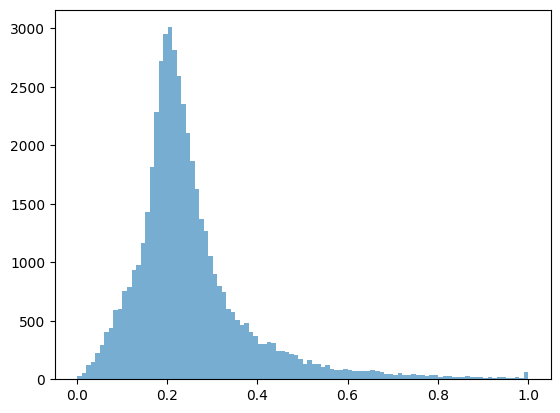

In [94]:
plt.hist(spin0_dataset['lev_ratio'], bins=100, alpha=0.6, label="iter0")

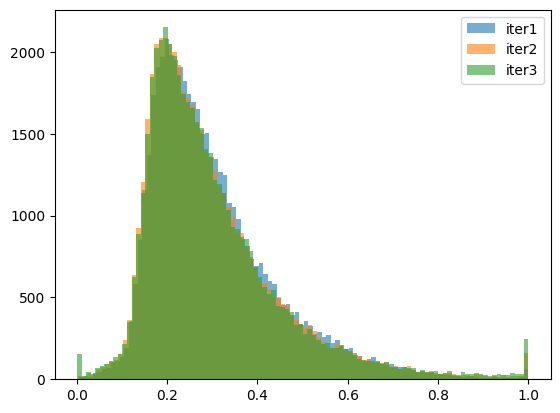

In [95]:
plt.hist(spin1_dataset['lev_ratio'], bins=100, alpha=0.6, label="iter1")
plt.hist(spin2_dataset['lev_ratio'], bins=100, alpha=0.6, label="iter2")
plt.hist(spin3_dataset['lev_ratio'], bins=100, alpha=0.6, label="iter3")
plt.legend()

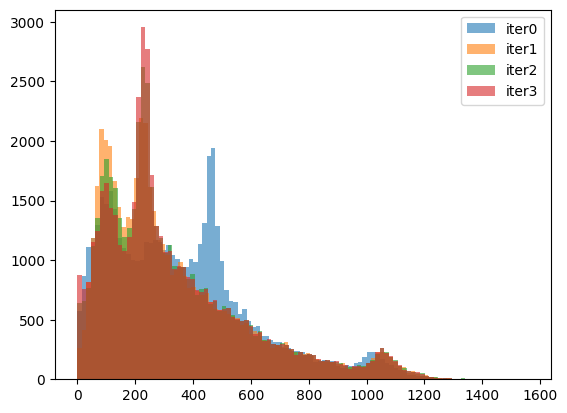

In [96]:
plt.hist(spin0_dataset['lev_distance'], bins=100, alpha=0.6, label="iter0")
plt.hist(spin1_dataset['lev_distance'], bins=100, alpha=0.6, label="iter1")
plt.hist(spin2_dataset['lev_distance'], bins=100, alpha=0.6, label="iter2")
plt.hist(spin3_dataset['lev_distance'], bins=100, alpha=0.6, label="iter3")
plt.legend()

In [98]:
small_gap_spin0_ds =  spin0_dataset.filter(lambda x: x['lev_ratio'] == 1.0)
small_gap_spin0_ds

Filter: 100%|██████████| 49792/49792 [00:01<00:00, 35704.33 examples/s]


Dataset({
    features: ['generated', 'real', 'lev_ratio', 'lev_distance'],
    num_rows: 58
})

In [99]:
small_gap_spin1_ds =  spin1_dataset.filter(lambda x: x['lev_ratio'] == 1.0)
small_gap_spin1_ds

Filter: 100%|██████████| 49792/49792 [00:01<00:00, 34580.26 examples/s]


Dataset({
    features: ['real', 'generated', 'lev_ratio', 'lev_distance'],
    num_rows: 54
})

In [97]:
small_gap_spin2_ds =  spin2_dataset.filter(lambda x: x['lev_ratio'] == 1.0)
small_gap_spin2_ds

Filter: 100%|██████████| 49792/49792 [00:01<00:00, 35670.91 examples/s]


Dataset({
    features: ['generated', 'real', 'lev_ratio', 'lev_distance'],
    num_rows: 154
})

In [100]:
small_gap_spin3_ds =  spin3_dataset.filter(lambda x: x['lev_ratio'] == 1.0)
small_gap_spin3_ds

Filter: 100%|██████████| 49792/49792 [00:01<00:00, 34707.05 examples/s]


Dataset({
    features: ['generated', 'real', 'lev_ratio', 'lev_distance'],
    num_rows: 238
})